In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
]

reviews_count_columns = [
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_2gis",
    "reviews_cnt_avito",
    "ratings_cnt_ya"
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir",  # !
    "phb_all_bad_dir",  # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num"
]

In [5]:
df1 = pd.read_csv('../data/tinkoff_legal_entities_new.csv')
missing = df1.isna().sum() / df1.shape[0] * 100
missing

id                           0.000000
date                         0.000000
phones_num                   0.000000
phb_fraud                    0.073333
phb_dirty                    0.073333
phb_all_bad                  0.073333
phb_all                      0.073333
phb_bad_perc                 0.073333
found_phones                 0.073333
phb_fraud_dir                8.206667
phb_dirty_dir                8.206667
phb_all_bad_dir              8.206667
phb_all_dir                  8.206667
phb_bad_perc_dir             8.206667
found_phones_dir             8.206667
claims_percent              34.013333
claims_num                  34.013333
appl_num                    34.013333
complaints_num              99.880000
complaints_num_dir          99.693333
mvd_request_num             93.320000
bad_rep_tcb                 99.153333
total_case_cnt              99.573333
total_defendant_case_cnt    99.573333
total_defendant_case_amt    99.573333
defendant_case_perc         99.573333
rating_ya   

In [6]:
missing.sort_values(inplace=True)

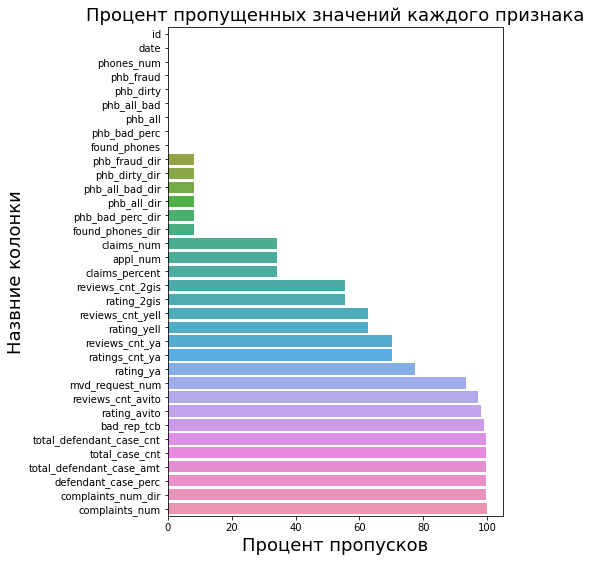

In [15]:
plt.figure(figsize=(6, 9))
sns.barplot(y=missing.index, x=missing.values)
plt.xlabel('Процент пропусков', fontsize=18)
plt.ylabel('Назвние колонки', fontsize=18)
plt.title('Процент пропущенных значений каждого признака', fontsize=18)
plt.savefig('../figures/missing_perc.png')


In [16]:
missing_by_groups = pd.Series([missing[phones].values.mean(),
                               missing[bank_and_police].values.mean(),
                               missing[reviews_count_columns].values.mean(),
                               missing[rating_columns].values.mean()])

missing_by_groups.index = ['Телефонные номера','Суды и жалобы',"Количество отзывов", "Рейтинг"]
missing_by_groups.sort_values(inplace=True)

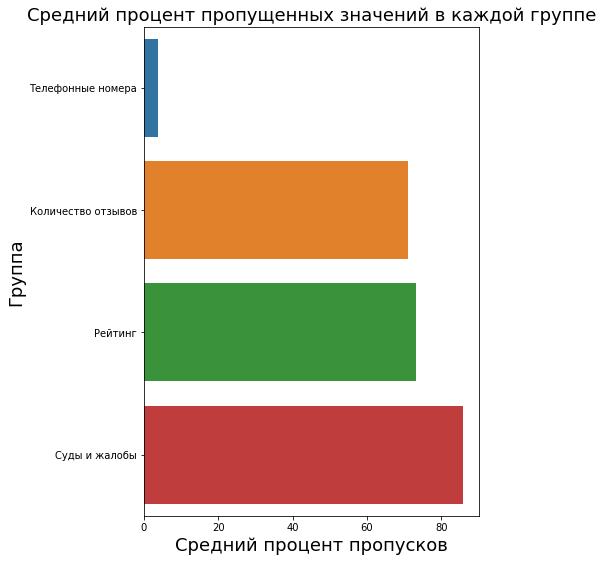

In [19]:
plt.figure(figsize=(6, 9))
sns.barplot(y=missing_by_groups.index, x=missing_by_groups.values)
plt.xlabel('Средний процент пропусков', fontsize=18)
plt.ylabel('Группа', fontsize=18)
plt.title('Средний процент пропущенных значений в каждой группе', fontsize=18)
plt.savefig('../figures/missing_by_group_perc.png')